In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from  sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# GETTING DATA


In [ ]:
df=pd.read_csv("hyundi.csv")

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax(£)        4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


In [ ]:
df.shape


(4860, 9)

In [ ]:
df.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


# Checking Missing Values


In [ ]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64

In [ ]:
df.duplicated().sum()

86

In [ ]:
df.drop_duplicates(keep=False, inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.columns:
    print(i)
    print(df[i].sort_values().unique())
    print('\n')

model
[' Accent' ' Amica' ' Getz' ' I10' ' I20' ' I30' ' I40' ' I800' ' IX20'
 ' IX35' ' Ioniq' ' Kona' ' Santa Fe' ' Terracan' ' Tucson' ' Veloster']


year
[2000 2002 2003 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020]


price
[ 1200  1295  1395 ... 40365 43995 92000]


transmission
['Automatic' 'Manual' 'Other' 'Semi-Auto']


mileage
[     1      2      4 ... 125968 130000 138000]


fuelType
['Diesel' 'Hybrid' 'Other' 'Petrol']


tax(£)
[  0  20  30 115 120 125 135 140 145 150 160 165 190 200 205 235 240 260
 265 300 305 325 330 555]


mpg
[  1.1  28.   28.8  30.4  31.7  32.8  33.6  34.   34.5  34.9  35.3  35.8
  36.2  37.2  37.7  38.2  38.7  39.2  39.8  40.4  40.9  41.5  42.2  42.8
  43.5  43.6  44.1  44.8  45.6  46.   46.3  47.1  47.9  48.7  49.6  50.4
  51.4  52.3  53.3  54.3  55.4  56.5  57.6  57.7  58.9  60.1  61.4  61.7
  62.8  64.2  65.7  67.3  68.9  70.6  72.4  74.3  76.3  78.4  78.5 256.8]


engineSize
[0.  1.  1.1 1.2 1.3 1.4 1.6 1.7 2.  

In [ ]:
a = df.select_dtypes(include=['int64', 'float64']).columns
b = df[a].agg(['mean', 'median', 'std']).transpose()

In [ ]:
num_quartiles = df[a].quantile([0.25, 0.5, 0.75])

In [ ]:
print(b)
print(num_quartiles)

                    mean   median           std
year         2017.086357   2017.0      1.922073
price       12738.850626  11995.0   5976.675921
mileage     21734.828771  17717.0  17532.607498
tax(£)        121.340972    145.0     58.138251
mpg            53.843900     55.4     12.773301
engineSize      1.462699      1.6      0.402313
        year    price  mileage  tax(£)   mpg  engineSize
0.25  2016.0   8000.0   8641.0   125.0  44.8         1.2
0.50  2017.0  11995.0  17717.0   145.0  55.4         1.6
0.75  2018.0  15695.0  31163.0   145.0  60.1         1.7


# Exploring categorical Values

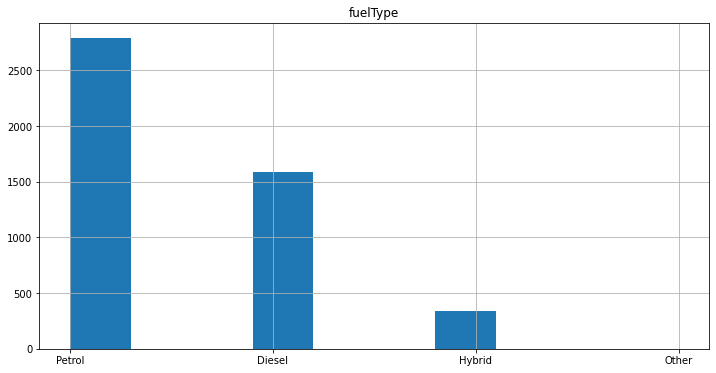

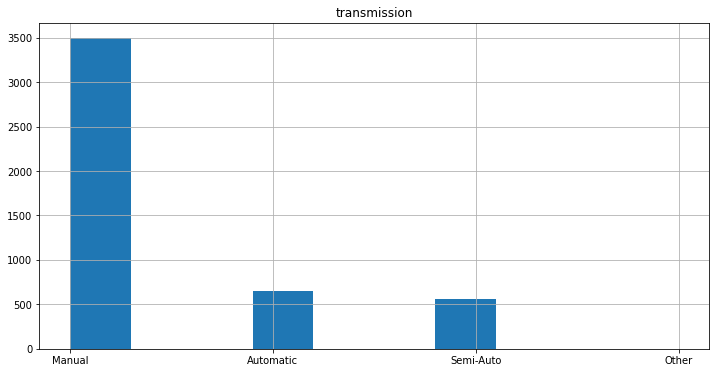

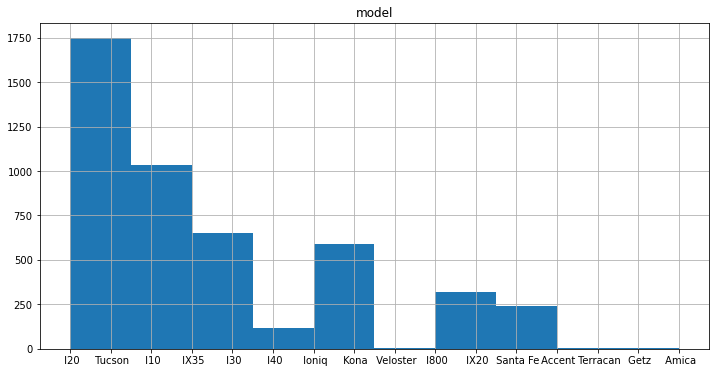

In [ ]:
cat_cols = ['fuelType', 'transmission', 'model']
for col in cat_cols:
    plt.figure(figsize=(12,6))
    df[col].hist()
    plt.title(col)
    plt.show()

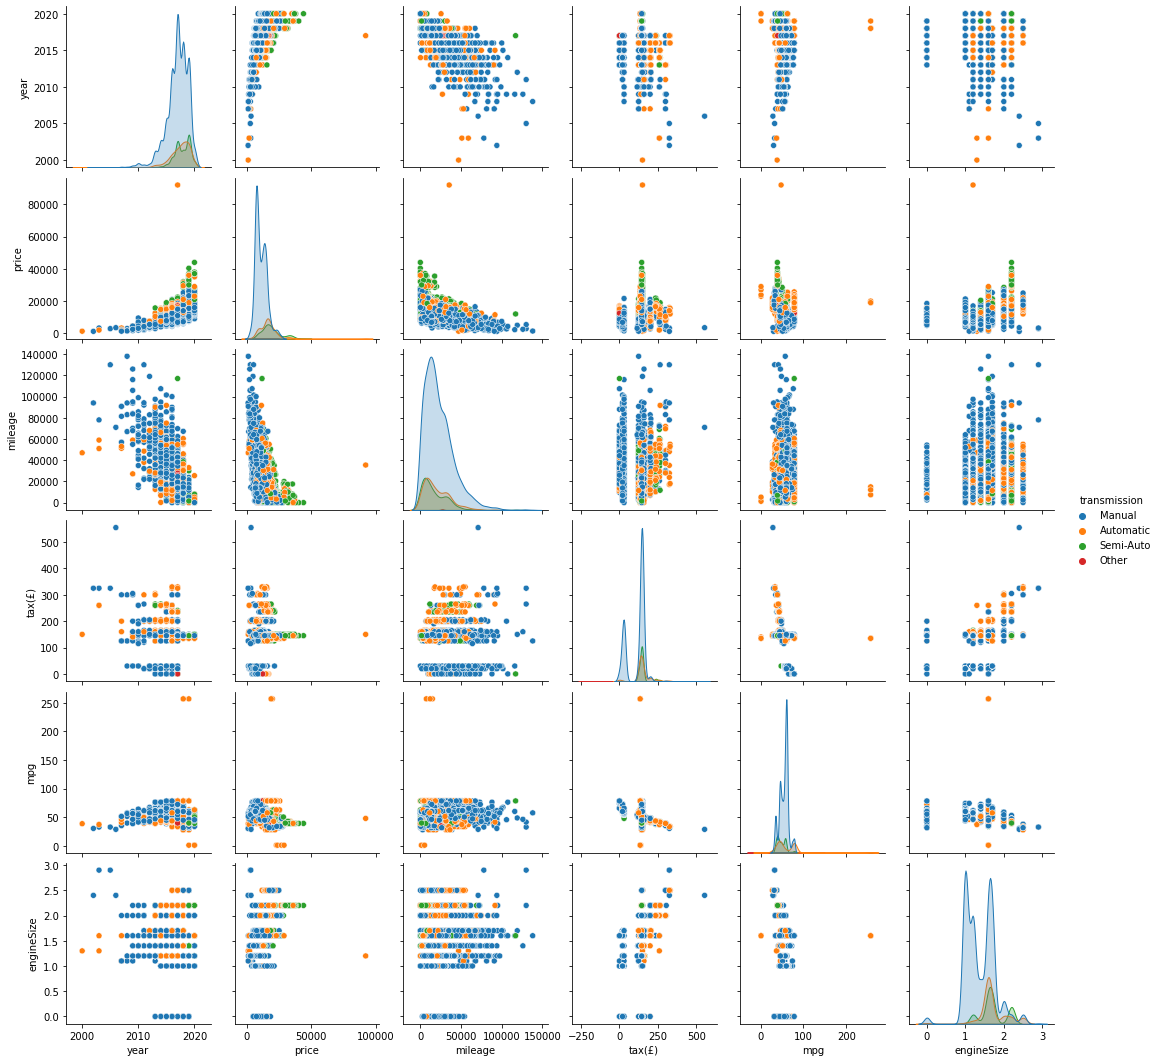

In [ ]:
sns.pairplot(df,hue ="transmission",diag_kind ="kde")

In [ ]:
contingency_table = pd.crosstab(df["transmission"],df["fuelType"])

stat,p,dof,expected = chi2_contingency(contingency_table)

alpha = 0.95
print("p value" + str(p))
if p <= alpha:
  print("Hypothesis Rejected")
else:
  print("Hypothesis Accepted")


p value0.0
Hypothesis Rejected


In [ ]:
contingency_table1 = pd.crosstab(df["fuelType"],df["model"])

stat,p,dof,expected = chi2_contingency(contingency_table1)

alpha = 0.95
print("p value"+ str(p))
if p <= alpha:
  print("Hypothesis Rejected")
else:
  print("Hypothesis Accepted")

p value0.0
Hypothesis Rejected


<Axes: >

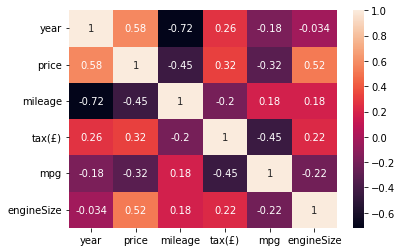

In [ ]:
sns.heatmap(df.corr(),annot =True)

# One Hot Encoding

In [ ]:
df.head(5)

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [ ]:
df = pd.get_dummies(df, columns = ['model', 'transmission','fuelType'])


In [ ]:
df.head(5)

,year,price,mileage,tax(£),mpg,engineSize,model_ Accent,model_ Amica,model_ Getz,model_ I10,...,model_ Tucson,model_ Veloster,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,7999,17307,145,58.9,1.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2016,14499,25233,235,43.5,2.0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,2016,11399,37877,30,61.7,1.7,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,2016,6499,23789,20,60.1,1.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,2015,10199,33177,160,51.4,2.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4713 entries, 0 to 4859
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    4713 non-null   int64  
 1   price                   4713 non-null   int64  
 2   mileage                 4713 non-null   int64  
 3   tax(£)                  4713 non-null   int64  
 4   mpg                     4713 non-null   float64
 5   engineSize              4713 non-null   float64
 6   model_ Accent           4713 non-null   uint8  
 7   model_ Amica            4713 non-null   uint8  
 8   model_ Getz             4713 non-null   uint8  
 9   model_ I10              4713 non-null   uint8  
 10  model_ I20              4713 non-null   uint8  
 11  model_ I30              4713 non-null   uint8  
 12  model_ I40              4713 non-null   uint8  
 13  model_ I800             4713 non-null   uint8  
 14  model_ IX20             4713 non-null   

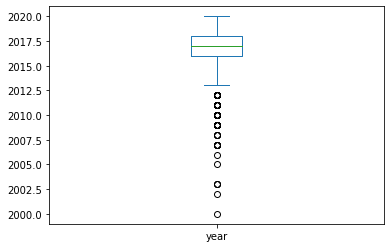

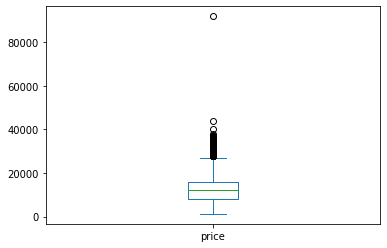

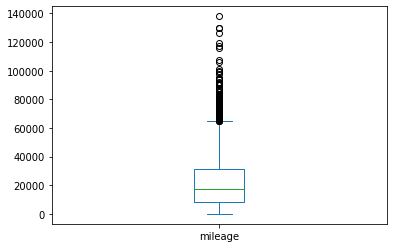

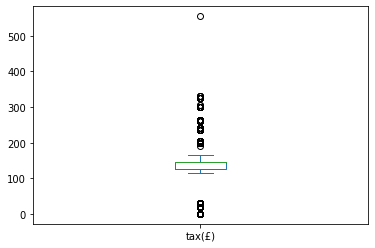

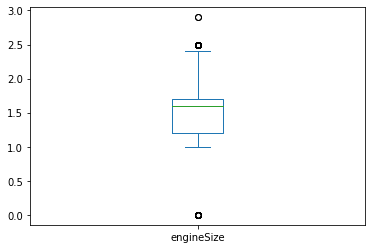

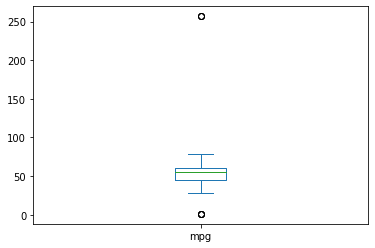

In [ ]:
col = ["year" ,"price" , "mileage" ,"tax(£)","engineSize","mpg"]
for i in col:
    df[i].plot(kind= 'box')
    plt.show()

In [ ]:
df.shape

(4713, 30)

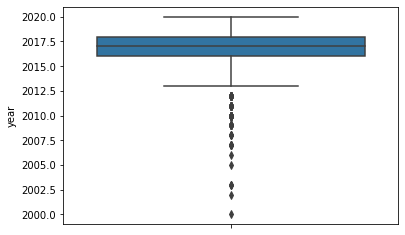

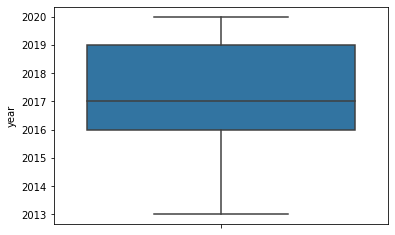

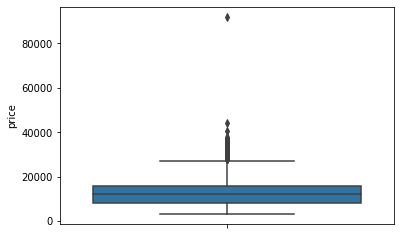

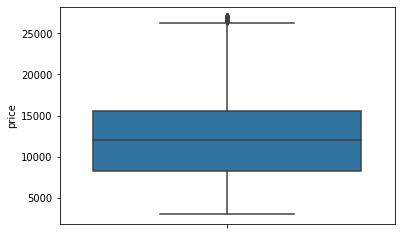

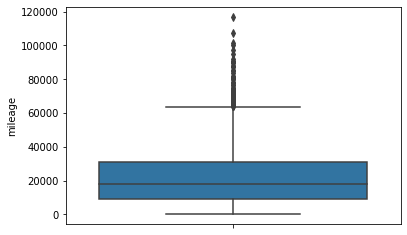

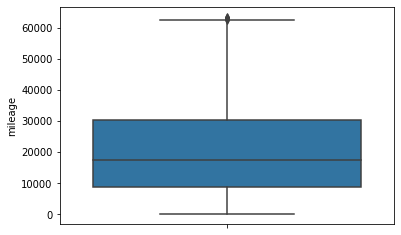

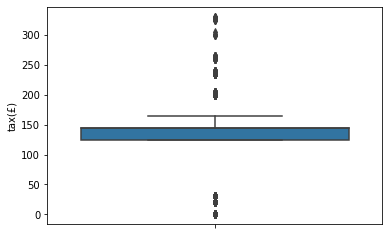

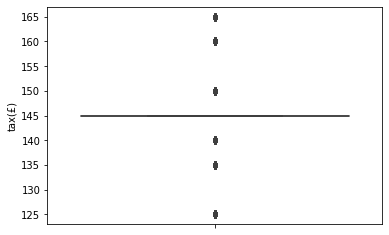

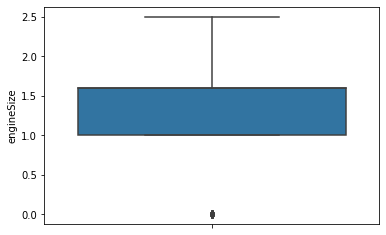

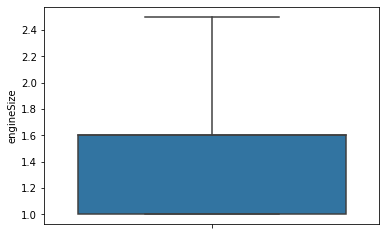

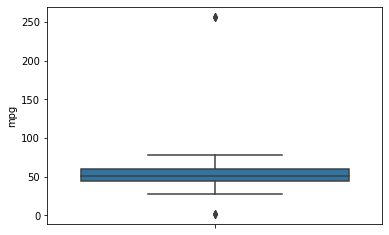

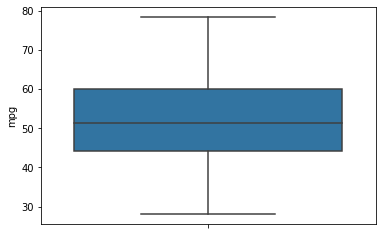

In [ ]:
col = ["year" ,"price" , "mileage" ,"tax(£)","engineSize","mpg"]

for c in col:
  plt.figure()
  sns.boxplot(y=c,data=df)
  percentile25=df[c].quantile(0.25)
  percentile75=df[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df=df[(df[c]<=upper_limit) & (df[c]>=lower_limit)]
  plt.figure()
  sns.boxplot(y=c,data=df)

In [ ]:
df.shape

(3162, 30)

In [ ]:
for i in df.columns:
    print(i)
    print(df[i].sort_values().unique())
    print('\n')

year
[2013 2014 2015 2016 2017 2018 2019 2020]


price
[ 4965  5400  5498 ... 26995 26999 27000]


mileage
[    1     2     4 ... 62106 62227 62308]


tax(£)
[125 135 140 145 150 160 165]


mpg
[28.  31.7 33.6 34.  34.5 34.9 35.3 35.8 36.2 37.2 37.7 38.2 38.7 39.8
 40.4 41.5 42.2 42.8 43.5 44.1 44.8 45.6 46.  46.3 47.1 47.9 48.7 49.6
 50.4 51.4 52.3 53.3 54.3 55.4 56.5 57.6 57.7 58.9 60.1 61.4 61.7 62.8
 64.2 65.7 67.3 68.9 70.6 72.4 74.3 78.4 78.5]


engineSize
[1.  1.2 1.4 1.6 1.7 2.  2.2 2.5]


model_ Accent
[0]


model_ Amica
[0]


model_ Getz
[0]


model_ I10
[0 1]


model_ I20
[0 1]


model_ I30
[0 1]


model_ I40
[0 1]


model_ I800
[0 1]


model_ IX20
[0 1]


model_ IX35
[0 1]


model_ Ioniq
[0 1]


model_ Kona
[0 1]


model_ Santa Fe
[0 1]


model_ Terracan
[0]


model_ Tucson
[0 1]


model_ Veloster
[0 1]


transmission_Automatic
[0 1]


transmission_Manual
[0 1]


transmission_Other
[0 1]


transmission_Semi-Auto
[0 1]


fuelType_Diesel
[0 1]


fuelType_Hybrid
[0 1]


fuelTy

# Spliting the data

In [ ]:
x=df.drop('price',axis=1).values
y=df['price'].values

In [ ]:
x

array([[2.0170e+03, 1.7307e+04, 1.4500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0150e+03, 3.3177e+04, 1.6000e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0160e+03, 3.0300e+04, 1.2500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0180e+03, 1.4788e+04, 1.5000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0180e+03, 2.3313e+04, 1.4500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0160e+03, 1.1472e+04, 1.2500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
y

array([ 7999, 10199, 14199, ...,  7200, 13994, 15999])

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=4)
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
reg=LinearRegression()

In [ ]:
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
y_pred

array([6.58196279e+03, 1.62831827e+04, 8.30596279e+03, 1.44831827e+04,
       1.16899628e+04, 8.10718275e+03, 1.88059628e+04, 1.80911827e+04,
       1.23071827e+04, 1.90951827e+04, 1.06819628e+04, 1.58739628e+04,
       1.88479628e+04, 2.06279628e+04, 1.28839628e+04, 1.87079628e+04,
       1.99219628e+04, 1.87071827e+04, 8.14596279e+03, 9.65396279e+03,
       1.09979628e+04, 1.79099628e+04, 1.88591827e+04, 1.13711827e+04,
       1.62031827e+04, 5.71796279e+03, 1.90351827e+04, 8.49796279e+03,
       9.07196279e+03, 1.06259628e+04, 1.78459628e+04, 1.01899628e+04,
       1.04119628e+04, 1.83019628e+04, 7.22396279e+03, 1.19119628e+04,
       6.70196279e+03, 1.42699628e+04, 1.58991827e+04, 1.61619628e+04,
       1.63471827e+04, 1.11359628e+04, 9.07518275e+03, 1.15139628e+04,
       2.12519628e+04, 8.06996279e+03, 1.18431827e+04, 1.32339628e+04,
       8.47796279e+03, 1.00579628e+04, 1.70031827e+04, 1.87999628e+04,
       1.77059628e+04, 1.77791827e+04, 1.19819628e+04, 1.76599628e+04,
      

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

2.280364024074732e+30

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1510087422659606.2

In [ ]:
print("r2Score",r2_score(y_test, y_pred))

r2Score -8.986706620682319e+22


# Decision Tree

In [ ]:
regressor = DecisionTreeRegressor(random_state=1)

In [ ]:
X=df.drop('price',axis=1).values
Y=df['price'].values

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=4)

In [ ]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
y_pred = regressor.predict(X_test)


In [ ]:
mse = mean_squared_error(Y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)

Mean Squared Error: 2980354.619539261


In [ ]:
print("r2Score",r2_score(Y_test, y_pred))

r2Score 0.8800245329550255


# Random Forest

In [ ]:
X=df.drop('price',axis=1).values
Y=df['price'].values

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=4)

In [ ]:
rf=RandomForestRegressor(n_estimators=10)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)
print("r2Score",r2_score(Y_test, Y_pred))

r2Score 0.9178148239540915


# SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_train)
print("Mean Square error : ", mean_squared_error(Y_train,Y_pred))
print("R2 Score : ",r2_score(Y_train,Y_pred))

Y_pred = model.predict(X_test)

print("Mean Square error : ", mean_squared_error(Y_test,Y_pred))
print("R2 Score : ",r2_score(Y_test,Y_pred))

Mean Square error :  15454651.865383668
R2 Score :  0.32375590464956394
Mean Square error :  24165417.635590274
R2 Score :  0.027210638573268664


# Grid Search CV


In [ ]:
number_of_trees=[5,6,7,8,9,10,11,12,15]
maximum_number_of_features=["sqrt","log2"]

maximum_depth=[5,6,7,8,9,10]
minimum_sample_split=[4,5,6,7,8,9,10]

In [ ]:
param_grid={'n_estimators':number_of_trees,
             'max_features':maximum_number_of_features,
             
             'max_depth':maximum_depth,
             'min_samples_split':minimum_sample_split}

print(param_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 15], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 6, 7, 8, 9, 10], 'min_samples_split': [4, 5, 6, 7, 8, 9, 10]}


In [ ]:
X=df.drop('price',axis=1).values
Y=df['price'].values

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=4)

In [ ]:
rf=RandomForestRegressor(n_estimators=10)

In [ ]:
grid_search= GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,verbose=2,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,Y_train)

Fitting 3 folds for each of 756 candidates, totalling 2268 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=10), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 15]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 15}

In [ ]:
model_grid=RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=5,n_estimators=15)
model_grid.fit(X_train,Y_train)
y_pred_grid=model_grid.predict(X_test)


In [ ]:
y_pred_grid

array([ 7434.10832865, 15827.46354391,  7970.65511801, 14861.84827134,
       12042.30333146,  8640.2379459 , 18461.36390205, 18066.78752067,
       10859.50799999, 18659.37274973, 10822.78725478, 15396.79043511,
       19816.39102132, 23983.62193503, 11402.55734556, 18665.31230209,
       20705.79196564, 19209.3916021 ,  7875.51397435,  9089.81719673,
        9528.16594578, 17749.70525127, 19337.7790198 , 11409.79511343,
       16220.50909226,  7136.47841267, 20419.94444931,  7900.88118949,
        8863.6473251 , 10271.74081178, 15982.2793869 ,  9433.92246978,
        9756.27433962, 16740.95196234,  7497.33297646, 11073.64248541,
        7383.81783579, 14983.06933045, 15129.79548796, 16525.42217961,
       15594.89817195,  9919.1468661 ,  8533.5747713 , 11987.98452735,
       21556.41932474,  8340.76150215, 11520.18122455, 13487.16860586,
        7900.88118949,  9477.36851582, 16407.70723086, 21792.32498797,
       15950.21774384, 17146.30234214, 13149.0568254 , 15804.41996606,
      

In [ ]:
print("r2Score",r2_score(Y_test, y_pred_grid))

r2Score 0.9266711520452415


# Polynomial Regression

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=40)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.8882661297864652


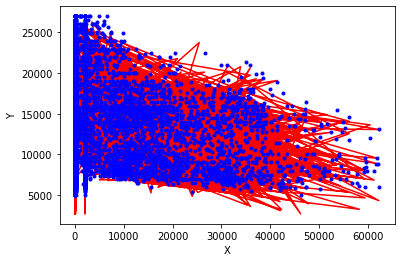

In [ ]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.9317459312927288


In [ ]:
#applying polynomial regression degree 3
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

-20.63582890267122


In [ ]:
print(lr.coef_)
print(lr.intercept_)

[-6.90122130e+02 -1.43649915e+01 -7.52664618e+01 ...  0.00000000e+00
  0.00000000e+00  2.88684468e-01]
155271401.0868079
